# Unsupervised Capstone Project
# Goal: Build an unsupervised model that will classify authors based on the style of writing using natural language processing.
 

In [134]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 100)

# Define functions to clean, lemmatize and process the text file as a string.

In [135]:
#This function expects a raw string. The purpose of this function is to take the string
#text and remove double dashes, punctuactions and special characters.
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub(r'_','',text)
    text = re.sub("[\[].*?[\]]", "", text)
    #text = re.sub(r'[\r|\n|\r\n]+', "", text)
    text = re.sub('[^a-zA-z\s]', "", text)
    text = ' '.join(text.split())
    return text

In [136]:
#define a function to lemmatize the list
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
#nlp = spacy.load('en', parse = False, tag=False, entity=False)


#create a function to lemmatize the text in the combine list
def lemmatizestring(text):

    lmtzr = WordNetLemmatizer()

    return(" ".join([lmtzr.lemmatize(word) for word in word_tokenize(text)]))
    
    #using the following line of code creates a [E088] Text of length 1166183 exceeds maximum of 1000000.
    #text = nlp(text)
    #text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    #return text

In [137]:
#The function will take a raw text string and tokenize the words for given number. 
#For example, if the function is given a raw text string and the 1000 as input parameters
#it will create 1000 tokenized words store it in a list and repeat the process. The result 
#will be multiple lists equal to the num_of_words parametar.
#The purpose of this function is create a list of words that can be passed as input parameters 
#to our tfidf function that is used to create featurs.

def chunck_words_old(text,num_of_words):
    
    text = text.split(' ') #split on whitespace creates a token
    results = []
    res = []
    for word in text:
        res.append(word)
        if len(res)==num_of_words:
            results.append(" ".join(res))
            res = []
    results.append(" ".join(res))
    return(results) 

def chunck_words(text,num_of_words,source):
    text = text.split(' ') #split on whitespace creates a token
    results = []
    res = []
    author = []
    for word in text: #take 1000 words of text
        res.append(word) #add the words to a list one by one
        if len(res)==num_of_words: # When there are a total of 100 words
            results.append(" ".join(res)) #join the words together into a string by removing the white space
            author.append(source)
            res = [] #clear the list
    results.append(" ".join(res)) #print the final string with all of the words together
    author.append(source)
    return(results,author)

# Import text files in string format from ten different authors/sources. Execute functions to clean, lemmatize and process the files.

In [138]:
#find a title for the newbook
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [139]:
#load in the documents from nltk in a raw string 
#gutenberg.raw
#:return: the given file(s) as a single string.
#:rtype: str
caesar_raw_string = gutenberg.raw('shakespeare-caesar.txt')
hamlet_raw_string = gutenberg.raw('shakespeare-hamlet.txt')
macbeth_raw_string = gutenberg.raw('shakespeare-macbeth.txt')
ball_raw_string = gutenberg.raw('chesterton-ball.txt')
brown_raw_string = gutenberg.raw('chesterton-brown.txt')
thursday_raw_string = gutenberg.raw('chesterton-thursday.txt')
moby_dick_raw_string = gutenberg.raw('melville-moby_dick.txt')
bryant_raw_string = gutenberg.raw('bryant-stories.txt')
leaves_raw_string = gutenberg.raw('whitman-leaves.txt')
busterbrown_raw_string = gutenberg.raw('burgess-busterbrown.txt')
blake_raw_string = gutenberg.raw('blake-poems.txt')
bible_raw_string = gutenberg.raw('bible-kjv.txt')
alice_raw_string = gutenberg.raw('carroll-alice.txt')
persuasion_raw_string = gutenberg.raw('austen-persuasion.txt')
sense_raw_string = gutenberg.raw('austen-sense.txt')

In [140]:
#Verify output
#macbeth_raw_string


In [141]:
#Clean the raw file loaded as a string and print the output
caesar_cleaned_text = text_cleaner(caesar_raw_string)
hamlet_cleaned_text = text_cleaner(hamlet_raw_string)
macbeth_cleaned_text = text_cleaner(macbeth_raw_string)
ball_cleaned_text = text_cleaner(ball_raw_string)
brown_cleaned_text = text_cleaner(brown_raw_string)
thursday_cleaned_text = text_cleaner(thursday_raw_string)
moby_dick_cleaned_text = text_cleaner(moby_dick_raw_string)
bryant_cleaned_text = text_cleaner(bryant_raw_string)
leaves_cleaned_text = text_cleaner(leaves_raw_string)
busterbrown_cleaned_text = text_cleaner(busterbrown_raw_string)
blake_cleaned_text = text_cleaner(blake_raw_string)
bible_cleaned_text = text_cleaner(bible_raw_string)
alice_cleaned_text = text_cleaner(alice_raw_string)
persuasion_cleaned_text = text_cleaner(persuasion_raw_string)
sense_cleaned_text = text_cleaner(sense_raw_string)

In [142]:
#Verify output
#macbeth_cleaned_text

In [143]:
#Lemmatize the file to show the root words
caesar_lemmatize_text = lemmatizestring(caesar_cleaned_text)
hamlet_lemmatize_text = lemmatizestring(hamlet_cleaned_text)
macbeth_lemmatize_text = lemmatizestring(macbeth_cleaned_text)
ball_lemmatize_text = lemmatizestring(ball_cleaned_text)
brown_lemmatize_text = lemmatizestring(brown_cleaned_text)
thursday_lemmatize_text = lemmatizestring(thursday_cleaned_text)
moby_dick_lemmatize_text = lemmatizestring(moby_dick_cleaned_text)
bryant_lemmatize_text = lemmatizestring(bryant_cleaned_text)
leaves_lemmatize_text = lemmatizestring(leaves_cleaned_text)
busterbrown_lemmatize_text = lemmatizestring(busterbrown_cleaned_text)
blake_lemmatize_text = lemmatizestring(blake_cleaned_text)
bible_lemmatize_text = lemmatizestring(bible_cleaned_text)
alice_lemmatize_text = lemmatizestring(alice_cleaned_text)
persuasion_lemmatize_text = lemmatizestring(persuasion_cleaned_text)
sense_lemmatize_text = lemmatizestring(sense_cleaned_text)

In [144]:
#take the raw string and tokenize it for a default of 1000 words. However, decrease the 
#the num_of_words increases the size of the file. The opposite (increate of num_of_words
#decreases the size of the file). There to ensure the file size of each file is similar
#I am adjusting the value of num_of_words for each file.

num_of_words = 1000 #use for default value
new_tokenized_list_caesar,author0=chunck_words(caesar_lemmatize_text,200,'shakespeare')
new_tokenized_list_hamlet,author1=chunck_words(hamlet_lemmatize_text,200,'shakespeare')
new_tokenized_list_macbeth,author2=chunck_words(macbeth_lemmatize_text,200,'shakespeare')
new_tokenized_list_ball,author3=chunck_words(ball_lemmatize_text,550,'chesterton')
new_tokenized_list_brown,author4=chunck_words(brown_lemmatize_text,500,'chesterton')
new_tokenized_list_thursday,author5=chunck_words(thursday_lemmatize_text,500,'chesterton')
new_tokenized_list_moby_dick,author6=chunck_words(moby_dick_lemmatize_text,num_of_words,'melville')
new_tokenized_list_bryant,author7=chunck_words(bryant_lemmatize_text,200,'bryant')
new_tokenized_list_leaves,author8=chunck_words(leaves_lemmatize_text,450,'whitman')
new_tokenized_list_busterbrown,author9=chunck_words(busterbrown_lemmatize_text,100,'burgess')
new_tokenized_list_blake,author10=chunck_words(blake_lemmatize_text,50,'blake')
new_tokenized_list_bible,author11=chunck_words(bible_lemmatize_text,3000,'bible')
new_tokenized_list_alice,author12=chunck_words(alice_lemmatize_text,100,'carroll')
new_tokenized_list_persuasion,author13=chunck_words(persuasion_lemmatize_text,300,'austen')
new_tokenized_list_sense,author14=chunck_words(sense_lemmatize_text,num_of_words,'austen')

#new_tokenized_list_ball,author3

In [145]:
#Verify output
#new_tokenized_list_macbeth

# After all files have been imported, cleaned and process then identify the lenght of each file and combine them into one file. Create a new dataframe that contains the aurthor/source and document text of each file.

In [146]:
#Print the lengths of the tokenized list, as this will help us later on verify if we 
#have the correct number of rows when we combine the files.

#import unittest from TestStringMethods
#unittest.assertEqual(new_tokenized_list_caesar,author0)

print('lenght of caesar plus author: ',len(new_tokenized_list_caesar),len(author0))
print('lenght of hamlet plus author: ',len(new_tokenized_list_hamlet),len(author1))
print('lenght of macbeth plus author: ',len(new_tokenized_list_macbeth),len(author2))
print('lenght of ball plus author: ',len(new_tokenized_list_ball),len(author3))
print('lenght of brown plus author: ',len(new_tokenized_list_brown),len(author4))
print('lenght of thursday plus author: ',len(new_tokenized_list_thursday),len(author5))
print('lenght of moby dick plus author: ',len(new_tokenized_list_moby_dick),len(author6))
print('lenght of bryant plus author: ',len(new_tokenized_list_bryant),len(author7))
print('lenght of leaves plus author: ',len(new_tokenized_list_leaves),len(author8))
print('lenght of busterbrown plus author: ',len(new_tokenized_list_busterbrown),len(author9))
print('lenght of blake plus author: ',len(new_tokenized_list_blake),len(author10))
print('lenght of bible plus author: ',len(new_tokenized_list_bible),len(author11))
print('lenght of alice plus author: ',len(new_tokenized_list_alice),len(author12))
print('lenght of persuasion plus author: ',len(new_tokenized_list_persuasion),len(author13))
print('lenght of sense plus author: ',len(new_tokenized_list_sense),len(author14))

print('total lenght is',len(new_tokenized_list_caesar)+len(author0)+
     len(new_tokenized_list_hamlet)+len(author1)+ len(new_tokenized_list_macbeth)+len(author2)+
     len(new_tokenized_list_ball)+len(author3)+len(new_tokenized_list_brown)+ len(author4)+
     len(new_tokenized_list_thursday)+len(author5)+len(new_tokenized_list_moby_dick)+len(author6)+
     len(new_tokenized_list_bryant)+len(author7)+len(new_tokenized_list_leaves)+len(author8)+
     len(new_tokenized_list_busterbrown)+len(author9)+ len(new_tokenized_list_blake)+len(author10)+
     len(new_tokenized_list_bible)+len(author11)+ len(new_tokenized_list_alice)+len(author12)+
     len(new_tokenized_list_persuasion)+len(author13)+ len(new_tokenized_list_sense)+len(author14))

lenght of caesar plus author:  102 102
lenght of hamlet plus author:  148 148
lenght of macbeth plus author:  89 89
lenght of ball plus author:  149 149
lenght of brown plus author:  144 144
lenght of thursday plus author:  117 117
lenght of moby dick plus author:  214 214
lenght of bryant plus author:  231 231
lenght of leaves plus author:  272 272
lenght of busterbrown plus author:  159 159
lenght of blake plus author:  137 137
lenght of bible plus author:  264 264
lenght of alice plus author:  266 266
lenght of persuasion plus author:  278 278
lenght of sense plus author:  120 120
total lenght is 5380


In [147]:
#Combine the list of tokenized files into one list 
combine_tokenized_liststring = new_tokenized_list_caesar 
combine_tokenized_liststring.extend(new_tokenized_list_hamlet)
combine_tokenized_liststring.extend(new_tokenized_list_macbeth)
combine_tokenized_liststring.extend(new_tokenized_list_ball)
combine_tokenized_liststring.extend(new_tokenized_list_brown)
combine_tokenized_liststring.extend(new_tokenized_list_thursday)   
combine_tokenized_liststring.extend(new_tokenized_list_moby_dick)
combine_tokenized_liststring.extend(new_tokenized_list_bryant)                              
combine_tokenized_liststring.extend(new_tokenized_list_leaves)
combine_tokenized_liststring.extend(new_tokenized_list_busterbrown)
combine_tokenized_liststring.extend(new_tokenized_list_blake)
combine_tokenized_liststring.extend(new_tokenized_list_bible)
combine_tokenized_liststring.extend(new_tokenized_list_alice)
combine_tokenized_liststring.extend(new_tokenized_list_persuasion)
combine_tokenized_liststring.extend(new_tokenized_list_sense)

#Combine the list of authors into one list
combine_author_list= author0
combine_author_list.extend(author1)
combine_author_list.extend(author2)
combine_author_list.extend(author3)
combine_author_list.extend(author4)
combine_author_list.extend(author5)
combine_author_list.extend(author6)
combine_author_list.extend(author7)
combine_author_list.extend(author8)
combine_author_list.extend(author9)
combine_author_list.extend(author10)
combine_author_list.extend(author11)
combine_author_list.extend(author12)
combine_author_list.extend(author13)
combine_author_list.extend(author14)
print('combine tokenized length and author list:',len(combine_tokenized_liststring)+len( combine_author_list))


combine tokenized length and author list: 5380


# Analyze the dataframe and show the output of authors, document text and author codes

In [148]:
# Create an empty dataframe for the corpus texts and authors
text_string_df = pd.DataFrame()

In [149]:
#Add the combine list and author list as columns for the dataframe and view output
text_string_df['text'] = combine_tokenized_liststring 
text_string_df['authors'] = combine_author_list
text_string_df.head()


,text,authors
0,Actus Primus Scoena Prima Enter Flauius Murell...,shakespeare
1,matter nor woman matter but withal I am indeed...,shakespeare
2,replication of your sound Made in her Concaue ...,shakespeare
3,wing Will make him flye an ordinary pitch Who ...,shakespeare
4,the throng look vpon Caesar Caes What sayst th...,shakespeare


In [150]:
#verify pd series index
#pd.Series.sort_index(text_string_df)

In [151]:
#Make a column with an encoded label for each author
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
text_string_df['author_codes'] = lb_make.fit_transform(text_string_df['authors'])
text_string_df.head()

,text,authors,author_codes
0,Actus Primus Scoena Prima Enter Flauius Murell...,shakespeare,8
1,matter nor woman matter but withal I am indeed...,shakespeare,8
2,replication of your sound Made in her Concaue ...,shakespeare,8
3,wing Will make him flye an ordinary pitch Who ...,shakespeare,8
4,the throng look vpon Caesar Caes What sayst th...,shakespeare,8


In [152]:
#text_string_df['author_codes'].value_counts

#print(text_string_df['authors'].value_counts())
#print(text_string_df['author_codes'].value_counts())

text_string_df.groupby('author_codes')['authors'].value_counts()


author_codes  authors    
0             austen         398
1             bible          264
2             blake          137
3             bryant         231
4             burgess        159
5             carroll        266
6             chesterton     410
7             melville       214
8             shakespeare    339
9             whitman        272
Name: authors, dtype: int64

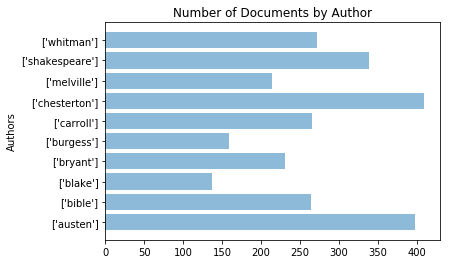

In [153]:
y_pos=np.arange(len(list(text_string_df.groupby('author_codes')['authors'].value_counts())))
plt.barh(y_pos,text_string_df.groupby('author_codes')['authors'].value_counts(), align='center', alpha=0.5)
plt.yticks(y_pos, text_string_df.groupby('author_codes')['authors'].unique())
plt.ylabel('Authors')
plt.title('Number of Documents by Author') 
plt.show()


# Generate Features

In [154]:
pd.set_option('display.max_columns', 500)

In [155]:
# Defining my X and Y variables
X = text_string_df.text
Y = text_string_df.author_codes

In [156]:
# load nltk's English stopwords as variable called 'stopwords' we will use this as a parameter
# in the CountVectorizer and TFIDF function
stopwords = nltk.corpus.stopwords.words('english')

In [157]:
#Updated to move the train/test code before the TFIDVectorizer 
from sklearn.model_selection import train_test_split
#splitting into training and test sets. Reserving 25% of my corpus as a test set.
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, 
                                                                Y,
                                                                test_size=0.25,
                                                                random_state=0)



#Generate features using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=3, # only use words that appear at least twice
                             stop_words=stopwords, 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

#tfidf=vectorizer.fit_transform is using the training data
tfidf=vectorizer.fit_transform(X_train_tfidf) #training a model when using a model
terms = vectorizer.get_feature_names()
X_tfidf = pd.DataFrame(data=tfidf.toarray(),
             columns=terms)

tfidf_test=vectorizer.transform(X_test_tfidf) #use this to test the model

X_tfidf.head()

,aaron,aarons,abandon,abandoned,abandonment,abase,abased,abated,abba,abbreviation,abdon,abel,abelmeholah,abhor,abhorred,abhorrence,abhorreth,abia,abiah,abiathar,abidan,abide,abideth,abiding,abiel,abiezer,abigail,abihail,abihu,abijah,ability,abimelech,abinadab,abiram,abishai,ablaze,able,abner,aboard,abode,abolished,abominable,abomination,aboriginal,aboue,abound,abounded,abounding,abraham,abrahams,abram,abreast,abroad,abrupt,abruptly,absalom,absence,absent,absently,absentminded,absolute,absolutely,absorb,absorbed,absorbing,abstain,abstinence,abstract,abstracted,abstraction,absurd,absurdity,abundance,abundant,abundantly,abuse,abused,abyss,academy,accelerate,accent,accept,acceptable,acceptance,accepted,accepteth,accepting,accepts,access,accident,accidental,accidentally,accommodate,accommodation,accompanied,accompaniment,accompany,accompanying,accomplish,accomplishd,accomplished,accomplishment,accord,accordance,according,accordingly,accosted,account,accounted,accumulated,accuracy,accurately,accursed,accusation,accuse,accused,accuser,accustomary,accustomed,achaia,achbor,ache,achieve,achieved,achilles,aching,achish,acknowledge,acknowledged,acknowledges,acknowledging,acknowledgment,acorn,acquaintance,acquainted,acquiescence,acquired,acquit,acquitted,acre,across,act,acte,acted,acting,action,active,actively,activity,actor,actress,acts,actual,actually,actus,acute,acuteness,ad,adaiah,adam,adamant,adapted,add,added,adder,addeth,adding,addition,additional,address,addressed,addressing,adequately,adhere,adhesiveness,adiel,adieu,adin,adjoining,adjure,admah,admirable,admirably,admiral,admirals,admiration,admire,admired,admirer,admiring,admit,admittance,admitted,admitting,admonished,admonition,ado,adobie,adonijah,adopt,adopted,adoption,adoration,adorn,adorned,adrift,adullam,adulterer,adulteress,adulterous,adultery,advance,advanced,advancing,advantage,advantageous,adventure,adventurer,adventures,adventurous,adversary,adverse,adversity,advertise,advice,advisable,advise,advised,adviser,advocate,aeneas,afar,affair,affaire,affayres,affeard,affect,affectation,affected,affecting,affection,affectionate,affectionately,affirm,affirmed,afflict,afflicted,affliction,affluence,afford,...,wisconsin,wisdom,wise,wisedome,wisely,wiser,wisest,wish,wished,wishing,wist,wistful,wistfully,wit,witch,witchcraft,witches,withal,withall,withdraw,withdrawal,withdrawing,withdrawn,withdrew,wither,witherd,withered,withereth,withheld,withhold,withholden,within,without,withstand,withstood,witness,witnesse,witnessed,witnessing,witty,wizard,woe,woeful,woke,wolf,woman,womanhood,womb,women,wonder,wondered,wonderful,wonderfully,wondering,wonderment,wondrous,wont,wonted,wood,wooded,wooden,woodland,woods,woof,wool,woollen,word,wordless,words,wore,work,worke,worked,worker,worketh,working,workman,workmanlike,workmanship,workshop,world,worldly,worlds,worm,worms,wormwood,worn,worried,worry,worse,worship,worshipped,worshipper,worshippeth,worshipping,worst,worsted,worth,worthless,worthy,wot,would,wouldest,wouldnt,wouldst,wound,wounded,wounding,woven,wrap,wrapped,wrapping,wrapt,wrath,wreath,wreck,wreckd,wrecked,wren,wrench,wrenched,wrenching,wrest,wrestle,wrestled,wrestling,wretch,wretched,wretchedly,wretchedness,wriggle,wriggling,wring,wringing,wrinkle,wrinkled,wrist,writ,write,writer,writes,writhing,writing,written,wrong,wrongd,wronged,wrongfully,wrongly,wrote,wroth,wrought,wrung,xi,xiii,xiv,xv,xvi,yacht,yankee,yard,yardarm,yarn,yawned,yawning,ye,yea,year,yeare,yeares,yearly,yearning,years,yeeld,yell,yelled,yelling,yellow,yer,yes,yesterday,yesternight,yet,yeve,yield,yielded,yieldeth,yielding,yojo,yoke,yoked,yon,yond,yonder,yong,york,yosemite,youd,youl,youll,young,younger,youngest,youngster,youre,youth,youthful,youve,youward,zabad,zabdi,zaccur,zacharias,zadok,zanoah,zeal,zealand,zealous,zealously,zebadiah,zebedee,zeboim,zebulun,zechariah,zedekiah,zelia,zephaniah,zerah,zerubbabel,zeruiah,zichri,zidon,zidonians,ziha,ziklag,zimri,zin,zion,ziph,zippor,zoan,zoar,zobah,zodiac,zohar,zone,zorah,zuar

In [158]:
#verify the index series. As a result of the test/train split I think the index our 
#no longer sequential
pd.Series.sort_index(X_train_tfidf).head()

0    Actus Primus Scoena Prima Enter Flauius Murell...
2    replication of your sound Made in her Concaue ...
3    wing Will make him flye an ordinary pitch Who ...
5    Forgets the shewes of Loue to other men Cassi ...
6    or did vse To stale with ordinary Oathes my lo...
Name: text, dtype: object

In [159]:
#The output above confirms the index are not sequential and this will cause problems for us
#during our model clustering so lets reset the index now for all of the test/train variables
X_train_tfidf = X_train_tfidf.reset_index(drop=True)
X_test_tfidf = X_test_tfidf.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
#X_train_tfidf

In [160]:
#verify the index series 
pd.Series.sort_index(X_train_tfidf).head()

0    carriage with four horse and with her own comp...
1    The guidon flag flutter gayly in the wind Bivo...
2    and Buster Bear had been fishing together in t...
3    one stroke I feel like that he said laughing b...
4    the cruel order of her father and she said at ...
Name: text, dtype: object

# Generate clusters for K-means,MeanShift,SpectralClustering and AffinityPropagation

Top terms per cluster:
Cluster 0: Authour code: 0 whale ahab boat ship ye sea upon stubb captain like
Cluster 1: Authour code: 9 unto shall lord thou ye thy god thee son israel
Cluster 2: Authour code: 4 browns farmer buster boy berry green bear forest blacky pail
Cluster 3: Authour code: 6 love see old soul night thee day shall life thou
Cluster 4: Authour code: 3 haue ham caesar thou bru enter lord macb brutus shall
Cluster 5: Authour code: 0 mrs anne could elinor elliot would mr lady marianne miss
Cluster 6: Authour code: 8 buster joe little bear pool billy otter trout fish mink
Cluster 7: Authour code: 7 little jackal margery tailor came lion mother tiger boy nightingale
Cluster 8: Authour code: 8 alice queen hatter dormouse turtle cat gryphon mock rabbit dont
Cluster 9: Authour code: 2 turnbull syme macian man like brown face seemed thing quite
Prediction


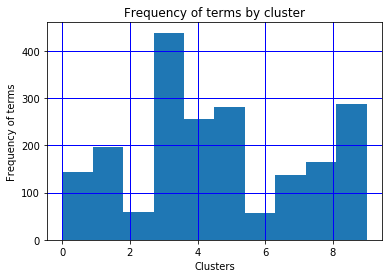

Comparing k-means clusters against authors:
col_0           0    1   2    3    4    5   6    7    8    9  Total
author_codes                                                       
0               0    0   0    9    0  280   0    0    0    0    289
1               0  195   0    2    0    0   0    0    0    0    197
2               0    0   0   80    1    0   0   16    0    0     97
3               2    1   0   71    0    0   0   97    0    0    171
4               0    0  58    5    0    0  57    8    0    0    128
5               0    0   0   18    0    0   0   16  164    0    198
6               0    0   0   17    0    0   0    0    0  280    297
7             142    0   0   17    0    0   0    0    0    7    166
8               0    0   0    1  255    0   0    0    0    0    256
9               0    0   0  218    0    0   0    0    0    0    218
Total         144  196  58  438  256  280  57  137  164  287   2017


In [161]:
#The goal of the following code is to print the K-means clusters and top terms by author source.
#The model has a cluster centers attribute that returns the coordinates of each of the 
#k cluster centroids. Each token in the vectorizer we created earlier has a dimension or 
#coordinate in the centroid and represents its relative frequency within that cluster. 
#So to find the words with the highest frequency in a cluster, we have to locate the 
#indices of the highest values of the centroid, which then correspond to the indices of 
#the tokens in the vectorizer. Therefore, below are the top ten frequented words in 
#each cluster for K-Means



from sklearn.cluster import KMeans
n_clusters = 10
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(tfidf)
pred = model.predict(tfidf) 

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %s: Authour code: %s" %(i, np.array(y_train[i])),end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind],end='')
    print()
    #print("\n")
print("Prediction")

plt.hist(model.labels_, bins=n_clusters)
plt.xlabel('Clusters')
plt.grid(color='b', linestyle='-', linewidth=1)
plt.ylabel('Frequency of terms')
plt.title('Frequency of terms by cluster')
plt.show()

print('Comparing k-means clusters against authors:')
print(pd.crosstab(y_train, pred, margins=True, margins_name="Total"))

In [162]:
#Running k-means cluster using with PCA to provide a graphically picture of the cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics


# Normalize the data to use with PCA.
#X_norm = normalize(X_train_tfidf)

# Reduce it to two components for visualization only, it is not used in KMeans
#X_pca = PCA(2).fit_transform(X_norm)

#Our SVD data reducer.  We are going to reduce the feature space from 18880 to 10.
svd= TruncatedSVD(10)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(tfidf)
X_test_lsa = lsa.transform(tfidf_test)


#define variable for components
components = svd.components_[1]

#print the components of the table
lsa_by_component=pd.DataFrame(X_train_lsa,index=X_train_tfidf)
#for i in range(10):
    #print('Component {}:'.format(i))
    #print(lsa_by_component.loc[:,i].sort_values(ascending=False)[0:2])
print(lsa_by_component.head())

# Calculate predicted values.

km = KMeans(n_clusters=10,n_init = 5, n_jobs = -1).fit(X_train_lsa)
y_pred = km.predict(X_train_lsa)
y_test_pred = km.predict(X_test_lsa)
labels = km.labels_

#order_centroids = km.cluster_centers_.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()
#print('The top terms for each Kmeans cluster using LSA: \n')

#if len(order_centroids) == len(svd.components_):
#    for i in range(svd.n_components):
#        print("LSA componet %s %2fs: " % (i, components[i]), end='')
#        print("Cluster %s: Author code: %s" %(i, np.array(y_train[i])),end='')
#        for ind in order_centroids[i, :10]:
#            print(' %s' % terms[ind], end='')
#        print()
#else:    
#    for i in range(n_clusters_):
#        print("LSA componet %2f:" % components[i], end='')
#        print("Cluster %s: Author code: %s" %(i, np.array(y_train[i])),end='')
#        for ind in order_centroids[i, :10]:
#            print(' %s' % terms[ind], end='')
#        print()

explained_variance = svd.explained_variance_ratio_.sum()
print("\n Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

#Print out result of pca
print('\n Comparing training k-means clusters against author codes:')
print(pd.crosstab(y_train, y_pred, margins=True, margins_name="Total"))

print('\n Comparing testing k-means clusters against author codes:')
print(pd.crosstab(y_test, y_test_pred, margins=True, margins_name="Total"))

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, y_pred)
print("\n The adjusted rand score is:",RIadjusted )

#create a result table
data = [{'Cluster':'K-Means', 'Number of clusters': n_clusters,
         'RI adjusted score': RIadjusted}]
df_results = pd.DataFrame(data)

df_results

                                                           0         1  \
text                                                                     
carriage with four horse and with her own compl...  0.491350 -0.535527   
The guidon flag flutter gayly in the wind Bivou...  0.661872 -0.367992   
and Buster Bear had been fishing together in th...  0.142769 -0.204082   
one stroke I feel like that he said laughing bu...  0.568744 -0.595667   
the cruel order of her father and she said at o...  0.827759 -0.136761   

                                                           2         3  \
text                                                                     
carriage with four horse and with her own compl...  0.572407  0.013017   
The guidon flag flutter gayly in the wind Bivou... -0.391347 -0.093228   
and Buster Bear had been fishing together in th... -0.264529  0.626957   
one stroke I feel like that he said laughing bu... -0.371830  0.094773   
the cruel order of her father and she

,Cluster,Number of clusters,RI adjusted score
0,K-Means,10,0.816303


In [163]:
#mean shift

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
#need to convert to a dense numpy array so I will use the X_tfidf
bandwidth = estimate_bandwidth(X_train_lsa, quantile=0.1, n_samples=X_train_lsa.shape[0])


# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_train_lsa)
ms_pred = ms.predict(X_train_lsa)
y_test_pred = ms.predict(X_test_lsa)
#ms.fit(X_pca)
    
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

# Extract cluster assignments for each data point.
labels = ms.labels_

ms_order_centroids = ms.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print('The top terms for each MeanShift cluster using LSA: \n')

#if len(ms_order_centroids) == len(svd.components_):
#    for i in range(svd.n_components):
#        print("LSA componet %s %2fs: " % (i, components[i]), end='')
#        print("Cluster %s: Author code: %s" %(i, np.array(y_train[i])),end='')
#        for ind in ms_order_centroids[i, :10]:
#            print(' %s' % terms[ind], end='')
#        print()
#else:    
#    for i in range(n_clusters_):
#        print("LSA componet %s %2fs: " % (i, components[i]), end='')
#        print("Cluster %s: Author code: %s" %(i, np.array(y_train[i])),end='')
#        for ind in ms_order_centroids[i, :10]:
#            print(' %s' % terms[ind], end='')
#        print()

print("\n Number of estimated clusters: {}".format(n_clusters_))
#print ("Labels identified: {}".format(labels)) # dosn't tell me much as it is just numbers

print('\n Comparing training meanshift clusters against authors:')
print(pd.crosstab(y_train, ms_pred, margins=True, margins_name="Total"))

print('\n Comparing testing meanshift clusters against author codes:')
print(pd.crosstab(y_test, y_test_pred, margins=True, margins_name="Total"))

RIadjusted = metrics.adjusted_rand_score(y_train, ms_pred)
print("\n The adjusted rand score is:",RIadjusted )

#update result table
data = [{'Cluster':'MeanShift', 'Number of clusters': n_clusters_,
         'RI adjusted score': RIadjusted}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results



Explained variance of the SVD step: 9%
The top terms for each MeanShift cluster using LSA: 


 Number of estimated clusters: 10

 Comparing training meanshift clusters against authors:
col_0           0    1    2    3    4    5  Total
author_codes                                     
0               7    0  282    0    0    0    289
1               0    0    0    0  197    0    197
2              80    0    0    0   13    4     97
3             142    0    2    2    9   16    171
4               4    0    0    0    0  124    128
5              11    0    0  187    0    0    198
6             297    0    0    0    0    0    297
7             166    0    0    0    0    0    166
8               0  255    0    0    1    0    256
9             210    0    0    0    8    0    218
Total         917  255  284  189  228  144   2017

 Comparing testing meanshift clusters against author codes:
col_0           0   1    2   3   4   5  Total
author_codes                                 
0           

,Cluster,Number of clusters,RI adjusted score
0,K-Means,10,0.816303
0,MeanShift,10,0.461811


In [164]:
#apectral clustering
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=10

# Declare and fit the model. Spectral clustering dosn't have a .predict method only
#so I must use the fit_predict method
sc = SpectralClustering(n_clusters=n_clusters)
#sc.fit(tfidf)
sc_pred = sc.fit_predict(X_train_lsa)
y_test_pred = sc.fit_predict(X_test_lsa)

#can't print the cluster centers so I am unable show the LSA components

print('Comparing training spectral clusters against authors:')
print(pd.crosstab(y_train, sc_pred, margins=True, margins_name="Total"))

print('\n Comparing testing spectral clusters against author codes:')
print(pd.crosstab(y_test, y_test_pred, margins=True, margins_name="Total"))

RIadjusted = metrics.adjusted_rand_score(y_train, sc_pred)
print("\n The adjusted rand score is:",RIadjusted )

#update result table
data = [{'Cluster':'SpectralClustering', 'Number of clusters': n_clusters,
         'RI adjusted score': RIadjusted}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

Comparing training spectral clusters against authors:
col_0           0    1    2    3    4    5   6    7    8    9  Total
author_codes                                                        
0             196    8    0    0    0    0  85    0    0    0    289
1               0    0    5    0    0   36   0  156    0    0    197
2               0   15   79    3    0    0   0    0    0    0     97
3               0  112   18    4    1   31   0    0    5    0    171
4               0    8    0  120    0    0   0    0    0    0    128
5               0   23    1    0  173    1   0    0    0    0    198
6               0  296    1    0    0    0   0    0    0    0    297
7               0   16    8    0    0    0   0    0  142    0    166
8               0    0    5    0    0   62   0    0    0  189    256
9               0    5  213    0    0    0   0    0    0    0    218
Total         196  483  330  127  174  130  85  156  147  189   2017

 Comparing testing spectral clusters against aut

,Cluster,Number of clusters,RI adjusted score
0,K-Means,10,0.816303
0,MeanShift,10,0.461811
0,SpectralClustering,10,0.628662


In [165]:
pd.set_option('display.max_columns', 500)
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train_lsa)
af_pred = af.fit_predict(X_train_lsa)
y_test_pred = af.fit_predict(X_test_lsa)


# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

af_order_centroids = af.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print('The top terms for each Affinity cluster using LSA: \n')

#if len(af_order_centroids) == len(svd.components_):
#    for i in range(svd.n_components):
#        print("LSA componet %s %2fs: " % (i, components[i]), end='')
#        print("Cluster %s: Author code: %s" %(i, np.array(y_train[i])),end='')
#        for ind in af_order_centroids[i, :10]:
#            print(' %s' % terms[ind], end='')
#        print()
#else:    
#    for i in range(n_clusters_):
#        print("LSA componet %s %2fs: " % (i, components[i]), end='')
#        print("Cluster %s: Author code: %s" %(i, np.array(y_train[i])),end='')
#        for ind in af_order_centroids[i, :10]:
#            print(' %s' % terms[ind], end='')
#        print()


print('Comparing training affinity clusters against authors:')
print(pd.crosstab(y_train, af_pred, margins=True, margins_name="Total"))
print('Estimated number of clusters: {}'.format(n_clusters_))

print('\n Comparing testing affinity clusters against author codes:')
print(pd.crosstab(y_test, y_test_pred, margins=True, margins_name="Total"))
print('Estimated number of clusters: {}'.format(n_clusters_))

RIadjusted = metrics.adjusted_rand_score(y_train, af_pred)
print("\n The adjusted rand score is:",RIadjusted )

#update result table
data3 = [{'Cluster':'Affinity Clustering', 'Number of clusters': n_clusters_,
         'RI adjusted score': RIadjusted}]


#update result table
#data = [{'Cluster':'AffinityPropagation', 'Number of clusters': len(cluster_centers_indices),
#         'RI adjusted score': RIadjusted}]

d3 = pd.DataFrame(data3)
df_results = df_results.append(d) 

df_results

The top terms for each Affinity cluster using LSA: 

Comparing training affinity clusters against authors:
col_0          0   1   2   3   4   5   6   7   8    9  10  11  12  13  14  15  \
author_codes                                                                    
0              0   0   0   0   0   0   0   0  68    0   0   0   0   0   0   0   
1             47   0   0   0   0  36   0   0   0    0   0   0  45   0  37   0   
2              0   8   2   0  17   0   0   0   0    0   0   5   0   0   0   0   
3              0  16  44  26   0   0   0   0   0    0   0   0   0   1   3   0   
4              0   0   4   0   0   0   0   0   0    0   0   0   0   0   0   0   
5              0   0  11   2   0   0   0   0   0  105   0   0   0  59   0   0   
6              0   0   0   0   0   0   0  91   0    0   0   0   0   0   0   0   
7              0   0   0   0   0   0   0   0   0    0   0   0   0   0   0  45   
8              0   0   0   0   0   0  40   0   0    0  43   0   0   0   1   0   
9 

,Cluster,Number of clusters,RI adjusted score
0,K-Means,10,0.816303
0,MeanShift,10,0.461811
0,SpectralClustering,10,0.628662
0,Affinity Clustering,22,0.389168


# Evaluate the accurcy for each of the clusters

In [166]:
#reset the index so that I can update the RI and adjusted score later.
df_results = df_results.reset_index(drop=True)
df_results

,Cluster,Number of clusters,RI adjusted score
0,K-Means,10,0.816303
1,MeanShift,10,0.461811
2,SpectralClustering,10,0.628662
3,Affinity Clustering,22,0.389168


The RIscore is: 0.020440384362171368
The adjusted rand score is: 0.7211034660272139


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0204404,0.721103
0,SpectralClustering,10,0.0204404,0.721103
0,MeanShift,6,0.0204404,0.721103
0,AffinityPropagation,24,0.0204404,0.721103


# In summation based on my results table none of my clusters are predicting a 100% agreement between my ground truth and my solution but Kmeans Clustering is predicting the higher RI adjusted score and implies it is predicting the most accurate number of clusters. 

# Generate Models

In [171]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import ensemble

knn = KNeighborsClassifier(n_neighbors=10)
train = knn.fit(tfidf, y_train)
y_pred = knn.predict(tfidf_test)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(knn, tfidf, y_train, cv=5)
cv_results_test = cross_val_score(knn, tfidf_test, y_test, cv=5)
print('KNN Training mean set score:', cv_results_train.mean())
print('KNN Testing mean set score:', cv_results_test.mean())

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('\n KNN Confustion Matrix \n', confusion_matrix(y_test,y_pred))  
print('\n KNN Classification Report \n', classification_report(y_test,y_pred))  
print('KNN accuracy score:', accuracy_score(y_test, y_pred))  

KNN Training mean set score: 0.9260875957840009
KNN Testing mean set score: 0.876811848551819

 KNN Confustion Matrix 
 [[108   0   0   0   0   0   0   1   0   0]
 [  0  67   0   0   0   0   0   0   0   0]
 [  0  11  26   1   1   0   0   0   0   1]
 [  0   5   0  51   0   4   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0]
 [  0   0   1   0   1  66   0   0   0   0]
 [  1   0   0   0   0   0 111   1   0   0]
 [  0   1   0   0   0   0   0  47   0   0]
 [  0   5   0   0   0   0   0   0  78   0]
 [  0  14   0   0   0   0   1   0   0  39]]

 KNN Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       109
           1       0.65      1.00      0.79        67
           2       0.96      0.65      0.78        40
           3       0.98      0.85      0.91        60
           4       0.94      1.00      0.97        31
           5       0.94      0.97      0.96        68
           6       0.99      0.98      0

In [173]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import ensemble

svc = LinearSVC()
train = svc.fit(tfidf, y_train)
y_pred = svc.predict(tfidf_test)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(svc, tfidf, y_train, cv=5)
cv_results_test = cross_val_score(svc, tfidf_test, y_test, cv=5)
print('SVC Training mean set score:', cv_results_train.mean())
print('SVC Testing mean set score:', cv_results_test.mean())

print('\n Support vector cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Support vector classification report \n',classification_report(y_test,y_pred))  
print('Support vector accuracy score:',accuracy_score(y_test, y_pred))  

SVC Training mean set score: 0.9930905423072055
SVC Testing mean set score: 0.9776786951295511

 Support vector cufusion matrix 
 [[109   0   0   0   0   0   0   0   0   0]
 [  0  67   0   0   0   0   0   0   0   0]
 [  0   0  38   2   0   0   0   0   0   0]
 [  0   0   0  60   0   0   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0]
 [  0   0   1   0   0  67   0   0   0   0]
 [  0   0   0   0   0   0 113   0   0   0]
 [  0   0   0   0   0   0   0  48   0   0]
 [  0   0   0   0   0   0   0   0  83   0]
 [  0   0   0   0   0   0   0   0   0  54]]

 Support vector classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        67
           2       0.97      0.95      0.96        40
           3       0.97      1.00      0.98        60
           4       1.00      1.00      1.00        31
           5       1.00      0.99      0.99        68
           6       

In [40]:
#Execute the RandomForestClassifier Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
train = rfc.fit(tfidf, y_train)
y_pred = rfc.predict(tfidf_test)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(rfc,tfidf, y_train, cv=5)
cv_results_test = cross_val_score(rfc, tfidf_test, y_test, cv=5)
print('RFC Training mean set score:', cv_results_train.mean())
print('RFC Testing mean set score:', cv_results_test.mean())

print('\n Random Forest confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Random Forest classification report \n',classification_report(y_test,y_pred))  
print('Random Forest accuracy score:',accuracy_score(y_test, y_pred)) 

RFC Training mean set score: 0.8924398951302331
RFC Testing mean set score: 0.8301027409110038

 Random Forest confusion matrix 
 [[110   0   1   2   0   0   0   0   0   0]
 [  0  69   0   0   0   0   0   0   0   0]
 [  0   0  32   3   0   0   0   0   0   2]
 [  3   0   8  46   2   5   2   0   2   1]
 [  0   0   0   0  21   0   0   0   0   0]
 [  0   0   2   2   0  60   1   0   0   0]
 [  5   0   0   6   0   4  95   0   0   1]
 [  1   0   0   1   0   0   1  47   0   0]
 [  0   0   0   0   0   0   0   0  81   0]
 [  0   0   3   4   0   1   5   0   0  47]]

 Random Forest classification report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       113
           1       1.00      1.00      1.00        69
           2       0.70      0.86      0.77        37
           3       0.72      0.67      0.69        69
           4       0.91      1.00      0.95        21
           5       0.86      0.92      0.89        65
           6       0

In [167]:
#Execute the LogisticRegression Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(tfidf, y_train)
y_pred = lr.predict(tfidf_test)

#compare the training and testing results using cross validation
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(lr, tfidf, y_train, cv=5)
cv_results_test = cross_val_score(lr, tfidf_test, y_test, cv=5)
print('LR Training mean set score:', cv_results_train.mean())
print('LR Testing mean set score:', cv_results_test.mean())

print('\n Logistic regression confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Logistic classification report \n',classification_report(y_test,y_pred))  
print('Logistic accuracy score: ',accuracy_score(y_test, y_pred)) 



LR Training mean set score: 0.9707663581669694
LR Testing mean set score: 0.8975607072562287

 Logistic regression confusion matrix 
 [[109   0   0   0   0   0   0   0   0   0]
 [  0  67   0   0   0   0   0   0   0   0]
 [  0   0  29   3   1   0   0   0   0   7]
 [  0   0   0  59   0   0   1   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0]
 [  1   0   0   1   0  66   0   0   0   0]
 [  0   0   0   0   0   0 113   0   0   0]
 [  0   0   0   0   0   0   0  48   0   0]
 [  0   0   0   0   0   0   0   0  83   0]
 [  0   0   0   0   0   0   0   0   0  54]]

 Logistic classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      1.00      1.00        67
           2       1.00      0.72      0.84        40
           3       0.94      0.98      0.96        60
           4       0.97      1.00      0.98        31
           5       1.00      0.97      0.99        68
           6       0.

In [42]:
#Execute the GradientBoostingClassifier Model
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(tfidf, y_train)
y_pred = clf.predict(tfidf_test)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(clf, tfidf, y_train, cv=5)
cv_results_test = cross_val_score(clf, tfidf_test, y_test, cv=5)
print('Gradient Training mean set score:', cv_results_train.mean())
print('Gradient Testing mean set score:', cv_results_test.mean())

print('\n Gradient Boosting confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Gradient Boosting classification report \n',classification_report(y_test,y_pred))  
print('Gradient Boosting accuracy score:',accuracy_score(y_test, y_pred)) 




Gradient Training mean set score: 0.9422917168977664
Gradient Testing mean set score: 0.8963054988206736

 Gradient Boosting confusion matrix 
 [[107   0   0   5   0   0   0   0   0   1]
 [  0  69   0   0   0   0   0   0   0   0]
 [  0   0  33   3   0   0   0   0   0   1]
 [  0   1   3  64   0   0   0   0   0   1]
 [  0   0   0   0  21   0   0   0   0   0]
 [  0   0   2   4   0  59   0   0   0   0]
 [  0   0   0   1   0   0 110   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0]
 [  0   0   0   3   0   0   0   0  78   0]
 [  0   0   0   1   1   1   0   0   0  57]]

 Gradient Boosting classification report 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       113
           1       0.99      1.00      0.99        69
           2       0.87      0.89      0.88        37
           3       0.79      0.93      0.85        69
           4       0.95      1.00      0.98        21
           5       0.98      0.91      0.94        65
  

# Overall Model performance:
# KNN and SVM where consistent with each other with as their accuracy scores range from 98 and 99%
# Logistic regression, Random forest and Gradient boosting were not consistent as their accuracy scores range from 80, 92 and 96%

